<h1> CreditOne <h1>

In [1]:
#Importar librerias
import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

#estimators
#from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
#from sklearn.linear_model import LinearRegression
#from sklearn.svm import SVR
from sklearn import linear_model
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV


#model metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix

#cross validation
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split



<h2>Inicio: <br>
    1.Cleaning and Pre-processing <br>
    2.Covariance Estimation <br>
    4.Feature Engineering (either PCA or RFE) and Dimensionality Reduction <br>
<h2>

In [2]:
credit = pd.read_csv('default of credit card clients.csv', header =1)
print(credit)

#Se actualiza nombre de columna
credit = credit.rename(columns={'default payment next month': 'default_payment_next_month'})
credit = credit.rename(columns={'PAY_0': 'PAY_1'})

          ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
0          1      20000    2          2         1   24      2      2     -1   
1          2     120000    2          2         2   26     -1      2      0   
2          3      90000    2          2         2   34      0      0      0   
3          4      50000    2          2         1   37      0      0      0   
4          5      50000    1          2         1   57     -1      0     -1   
...      ...        ...  ...        ...       ...  ...    ...    ...    ...   
29995  29996     220000    1          3         1   39      0      0      0   
29996  29997     150000    1          3         2   43     -1     -1     -1   
29997  29998      30000    1          2         2   37      4      3      2   
29998  29999      80000    1          3         1   41      1     -1      0   
29999  30000      50000    1          2         1   46      0      0      0   

       PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6 

In [4]:
rawData = credit
rawData.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [11]:
from sklearn.decomposition import PCA
pca = PCA(n_components=20)
principalComponents = pca.fit_transform (rawData)
#principalDf = pd.DataFrame(data = principalComponents, columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18','PC19','PC20','PC21','PC22','PC23']) #PC = Principal component 
rawDataPCA = pd.DataFrame(data = principalComponents, columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18','PC19','PC20']) #PC = Principal component 
rawDataPCA.head()

print(pca)

PCA(copy=True, iterated_power='auto', n_components=20, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)


<h2>Inicio: <br>
    6.Classification (Build three model and choose the best) <br>
    7.Model Tuning (Tune at least two parameters for each model you build) <br>
    8.Model Evaluation
<h2>

In [9]:
#features
features = rawData.iloc[:,1:24]
print('Summary of feature sample')
print(features.head())

size= 0.30
seed= 3000

Summary of feature sample
   LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_1  PAY_2  PAY_3  PAY_4  \
0      20000    2          2         1   24      2      2     -1     -1   
1     120000    2          2         2   26     -1      2      0      0   
2      90000    2          2         2   34      0      0      0      0   
3      50000    2          2         1   37      0      0      0      0   
4      50000    1          2         1   57     -1      0     -1      0   

   PAY_5  ...  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
0     -2  ...        689          0          0          0         0       689   
1      0  ...       2682       3272       3455       3261         0      1000   
2      0  ...      13559      14331      14948      15549      1518      1500   
3      0  ...      49291      28314      28959      29547      2000      2019   
4      0  ...      35835      20940      19146      19131      2000     36681   

   PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY

In [12]:
#dependent variable
depVar = rawData['default_payment_next_month']
print(depVar)
print(len(depVar.index))

0        1
1        1
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    1
29998    1
29999    1
Name: default_payment_next_month, Length: 30000, dtype: int64
30000


In [13]:
#Training Set (Feature Space: X Training)
#X_train = (features[: 24000])
#X_train.head()

#x_train, x_test = train_test_split(features, test_size=size, random_state=seed, shuffle=True )
x_train, x_test = train_test_split(rawDataPCA, test_size=size, random_state=seed, shuffle=True )


#x_train,x_test,y_train,y_test = train_test_split(features,outcome,test_size=0.25,random_state=0)

In [14]:
print(x_train.head())
print(x_test.head())

print(len(x_train.index))
print(len(x_test.index))

                PC1            PC2           PC3           PC4           PC5  \
8993  -8.167176e+04  -89541.611106 -25011.004706   9656.839880   1108.089791   
21234  8.326597e+04  104718.926048  14945.715107  -9373.984968 -12985.425998   
25817  1.192227e+06 -258493.418754  32673.739417 -22273.771247 -30678.980269   
24277 -1.261039e+05  -18059.708563  -4380.571388   5564.070057  -3446.811103   
2440   5.227541e+04  -38527.222681  20376.648672  -6605.896537  -9089.545506   

               PC6           PC7           PC8          PC9         PC10  \
8993   8354.354090   3893.352919   1100.111309  1479.787336 -3309.257555   
21234  6923.962322   -983.043294    701.102382   232.500110  2673.820103   
25817  5280.214993 -21563.677064 -14144.131878 -9564.198176  2910.766434   
24277  3148.937541   1865.338202    261.048700  1317.914394 -1026.184722   
2440   8678.533955    192.660160   1436.429125   795.276881  5334.085948   

               PC11         PC12          PC13          PC14  

In [15]:
#Dependent Variable Training Set (y Training)
#y_train = depVar[: 1000]
#y_train_count = len(y_train.index)
#print('The number of observations in the Y training set are:',str(y_train_count))
#y_train.head()

#y_train, y_test = train_test_split(depVar, test_size=size, random_state=seed, shuffle=True )
y_train, y_test = train_test_split(depVar, test_size=size, random_state=seed, shuffle=True )



In [16]:
print(y_test.head())
#print(y_test.head())

print(len(x_test.index))
print(len(y_test.index))

11121    0
745      0
27335    0
20009    0
14001    0
Name: default_payment_next_month, dtype: int64
6000
6000


In [17]:
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split


In [20]:
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train)

In [21]:
x_train.shape, x_test.shape

((10125, 20), (3375, 20))

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train)
x_train.shape, x_test.shape

((7593, 20), (2532, 20))

In [25]:
#model = LinearRegression(n_jobs=10)
model = RandomForestClassifier(n_jobs=10, 
                             random_state=seed,
                             #criterion=RFC_METRIC,
                             #n_estimators=NUM_ESTIMATORS,
                             verbose=False)

<h2>Fin: Selecting and Dividing the Data<h2>

<h2>Inicio:Building the Models and Choosing the Right Model<h2>

In [26]:
#Models
#modelSVR = SVR()
#modelRF = RandomForestRegressor()
#modelLR = LinearRegression()
modelSVC = SVC()
modelRF = RandomForestClassifier()
modelGBC = GradientBoostingClassifier()


#features
features = rawData.iloc[:,1:24]
print('Summary of feature sample')
features.head()

In [27]:
#dependent variable
print(depVar)

0        1
1        1
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    1
29998    1
29999    1
Name: default_payment_next_month, Length: 30000, dtype: int64


In [28]:
model.fit(x_train,y_train)

C:\Users\andg2\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=10,
                       oob_score=False, random_state=3000, verbose=False,
                       warm_start=False)

In [29]:
modelRF.fit(x_train,y_train)

C:\Users\andg2\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [31]:
modelSVC.fit(x_train,y_train)

C:\Users\andg2\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [32]:
modelGBC.fit(x_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [34]:
from sklearn.model_selection import cross_val_score

In [35]:
print(cross_val_score(modelSVC, x_train, y_train)) 

C:\Users\andg2\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\andg2\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\andg2\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\andg2\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto'

[0.7871248  0.7874358  0.78735178]


In [36]:
print(cross_val_score(modelRF, x_train, y_train)) 
#These values correspond to the the following:
#1st value:  The score array for test scores on each cv split. (Higher is an indicator of a better performing model)
#2nd value: The time for fitting the estimator on the train set for each cv split.
#3rd Value:  The time for scoring the estimator on the test set for each cv split. 

C:\Users\andg2\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[0.81635071 0.82615567 0.82450593]


#preds = modelRF.predict(features)
#preds

preds = modelRF.predict(principalDf)
preds


In [38]:
print(cross_val_score(modelGBC, x_train, y_train))

C:\Users\andg2\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[0.82503949 0.82931648 0.82252964]


In [260]:
model.score(x_train,y_train)

0.9856296296296296

In [39]:
#Model Fitting
modelRF.fit(x_train,y_train)
print(cross_val_score(modelRF, x_train, y_train))
print(modelRF.score(x_train,y_train))

C:\Users\andg2\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[0.82266983 0.83405768 0.82134387]
0.9869616752271829


In [41]:
modelSVC.fit(x_train,y_train)
print(cross_val_score(modelSVC, x_train, y_train)) 
print(modelSVC.score(x_train,y_train))

C:\Users\andg2\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\andg2\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\andg2\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\andg2\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto'

[0.7871248  0.7874358  0.78735178]
1.0


In [42]:
modelGBC.fit(x_train,y_train)
print(cross_val_score(modelGBC, x_train, y_train)) 
print(modelGBC.score(x_train,y_train))

C:\Users\andg2\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[0.82464455 0.82892137 0.82213439]
0.8544712234953247


<h2>Fin:Building the Models and Choosing the Right Model<h2>

<H2>Inicio:Making Predictions and Evaluating the Results<h2>

In [47]:
predictionsSVC = modelSVC.predict(x_test)
print(predictionsSVC)

predictionsRF = modelRF.predict(x_test)
print(predictionsRF)

predictionsGBC = modelGBC.predict(x_test)
print(predictionsGBC)

[0 0 0 ... 0 0 0]
[1 0 0 ... 0 1 0]
[1 0 0 ... 0 1 1]


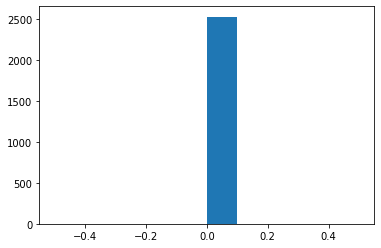

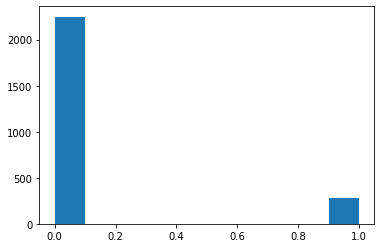

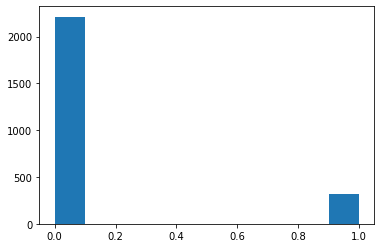

In [50]:
plt.hist(predictionsSVC)
plt.show()

plt.hist(predictionsRF)
plt.show()

plt.hist(predictionsGBC)
plt.show()

In [48]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [49]:
from math import sqrt

In [51]:
rmseSVC = sqrt(mean_squared_error(y_test, predictionsSVC))
print(rmseSVC)

rmseRF = sqrt(mean_squared_error(y_test, predictionsRF))
print(rmseRF)

rmseGBC = sqrt(mean_squared_error(y_test, predictionsGBC))
print(rmseGBC)

0.46944557396937003
0.41733753259651124
0.42157457048950703


In [52]:
predRsquaredSVC = r2_score(y_test,predictionsSVC)
print(predRsquaredSVC)

predRsquaredRF = r2_score(y_test,predictionsRF)
print(predRsquaredRF)

predRsquaredGBC = r2_score(y_test,predictionsGBC)
print(predRsquaredGBC)

-0.2826747720364742
-0.013726835964310347
-0.03441513873909208


In [81]:
#predRsquaredGBC = r2_score(y_test,predictionsGBC)
#print(predRsquaredGBC)

print('Model SVC:')
accSVC = accuracy_score(y_test, predictionsSVC)
print('Accuracy:', accSVC)
precSVC = precision_score(y_test, predictionsSVC)
print('Precision:', precSVC)
matSVC = confusion_matrix(y_test, predictionsSVC)
print('Correlation Matrix:')
print(matSVC)

print('Model RF:')
accRF = accuracy_score(y_test, predictionsRF)
print('Accuracy:', accRF)
precRF = precision_score(y_test, predictionsRF)
print('Precision:', precRF)
matRF = confusion_matrix(y_test, predictionsRF)
print('Correlation Matrix:')
print(matRF)


print('Model GBC:')
accGBC = accuracy_score(y_test, predictionsGBC)
print('Accuracy:', accGBC)
precGBC = precision_score(y_test, predictionsGBC)
print('Precision:', precGBC)
matGBC = confusion_matrix(y_test, predictionsGBC)
print('Correlation Matrix:')
print(matGBC)
    

Model SVC:
Accuracy: 0.7796208530805687
Precision: 0.0
Correlation Matrix:
[[1974    0]
 [ 558    0]]
Model RF:
Accuracy: 0.8258293838862559
Precision: 0.7067137809187279
Correlation Matrix:
[[1891   83]
 [ 358  200]]
Model GBC:
Accuracy: 0.8222748815165877
Precision: 0.66875
Correlation Matrix:
[[1868  106]
 [ 344  214]]


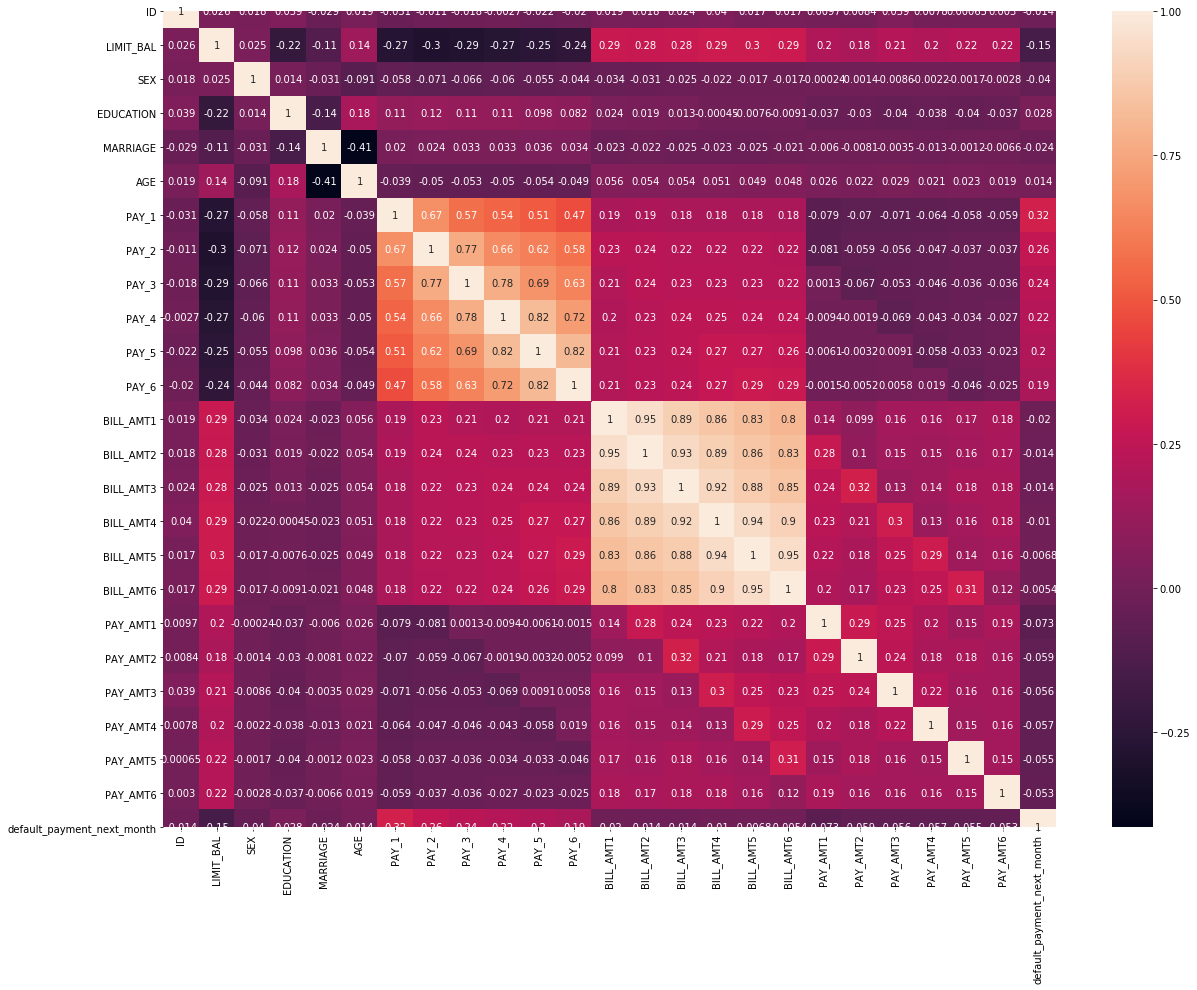

In [84]:
corr = rawData.corr()
plt.figure(figsize=(20,15))
sns.heatmap(corr, annot = True)
plt.show()

<h2>Fin:Making Predictions and Evaluating the Results <h2>


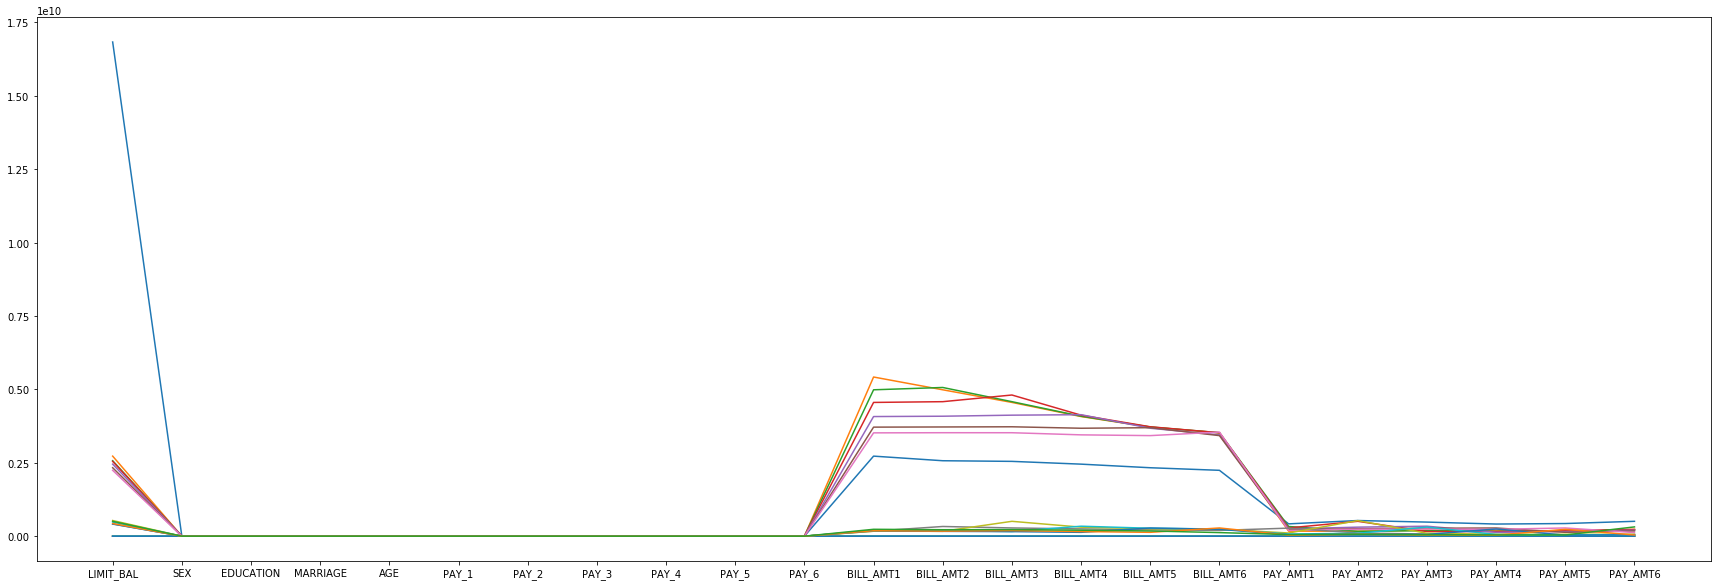

In [318]:
plt.figure(figsize = (30,10))
plt.plot(covMat)


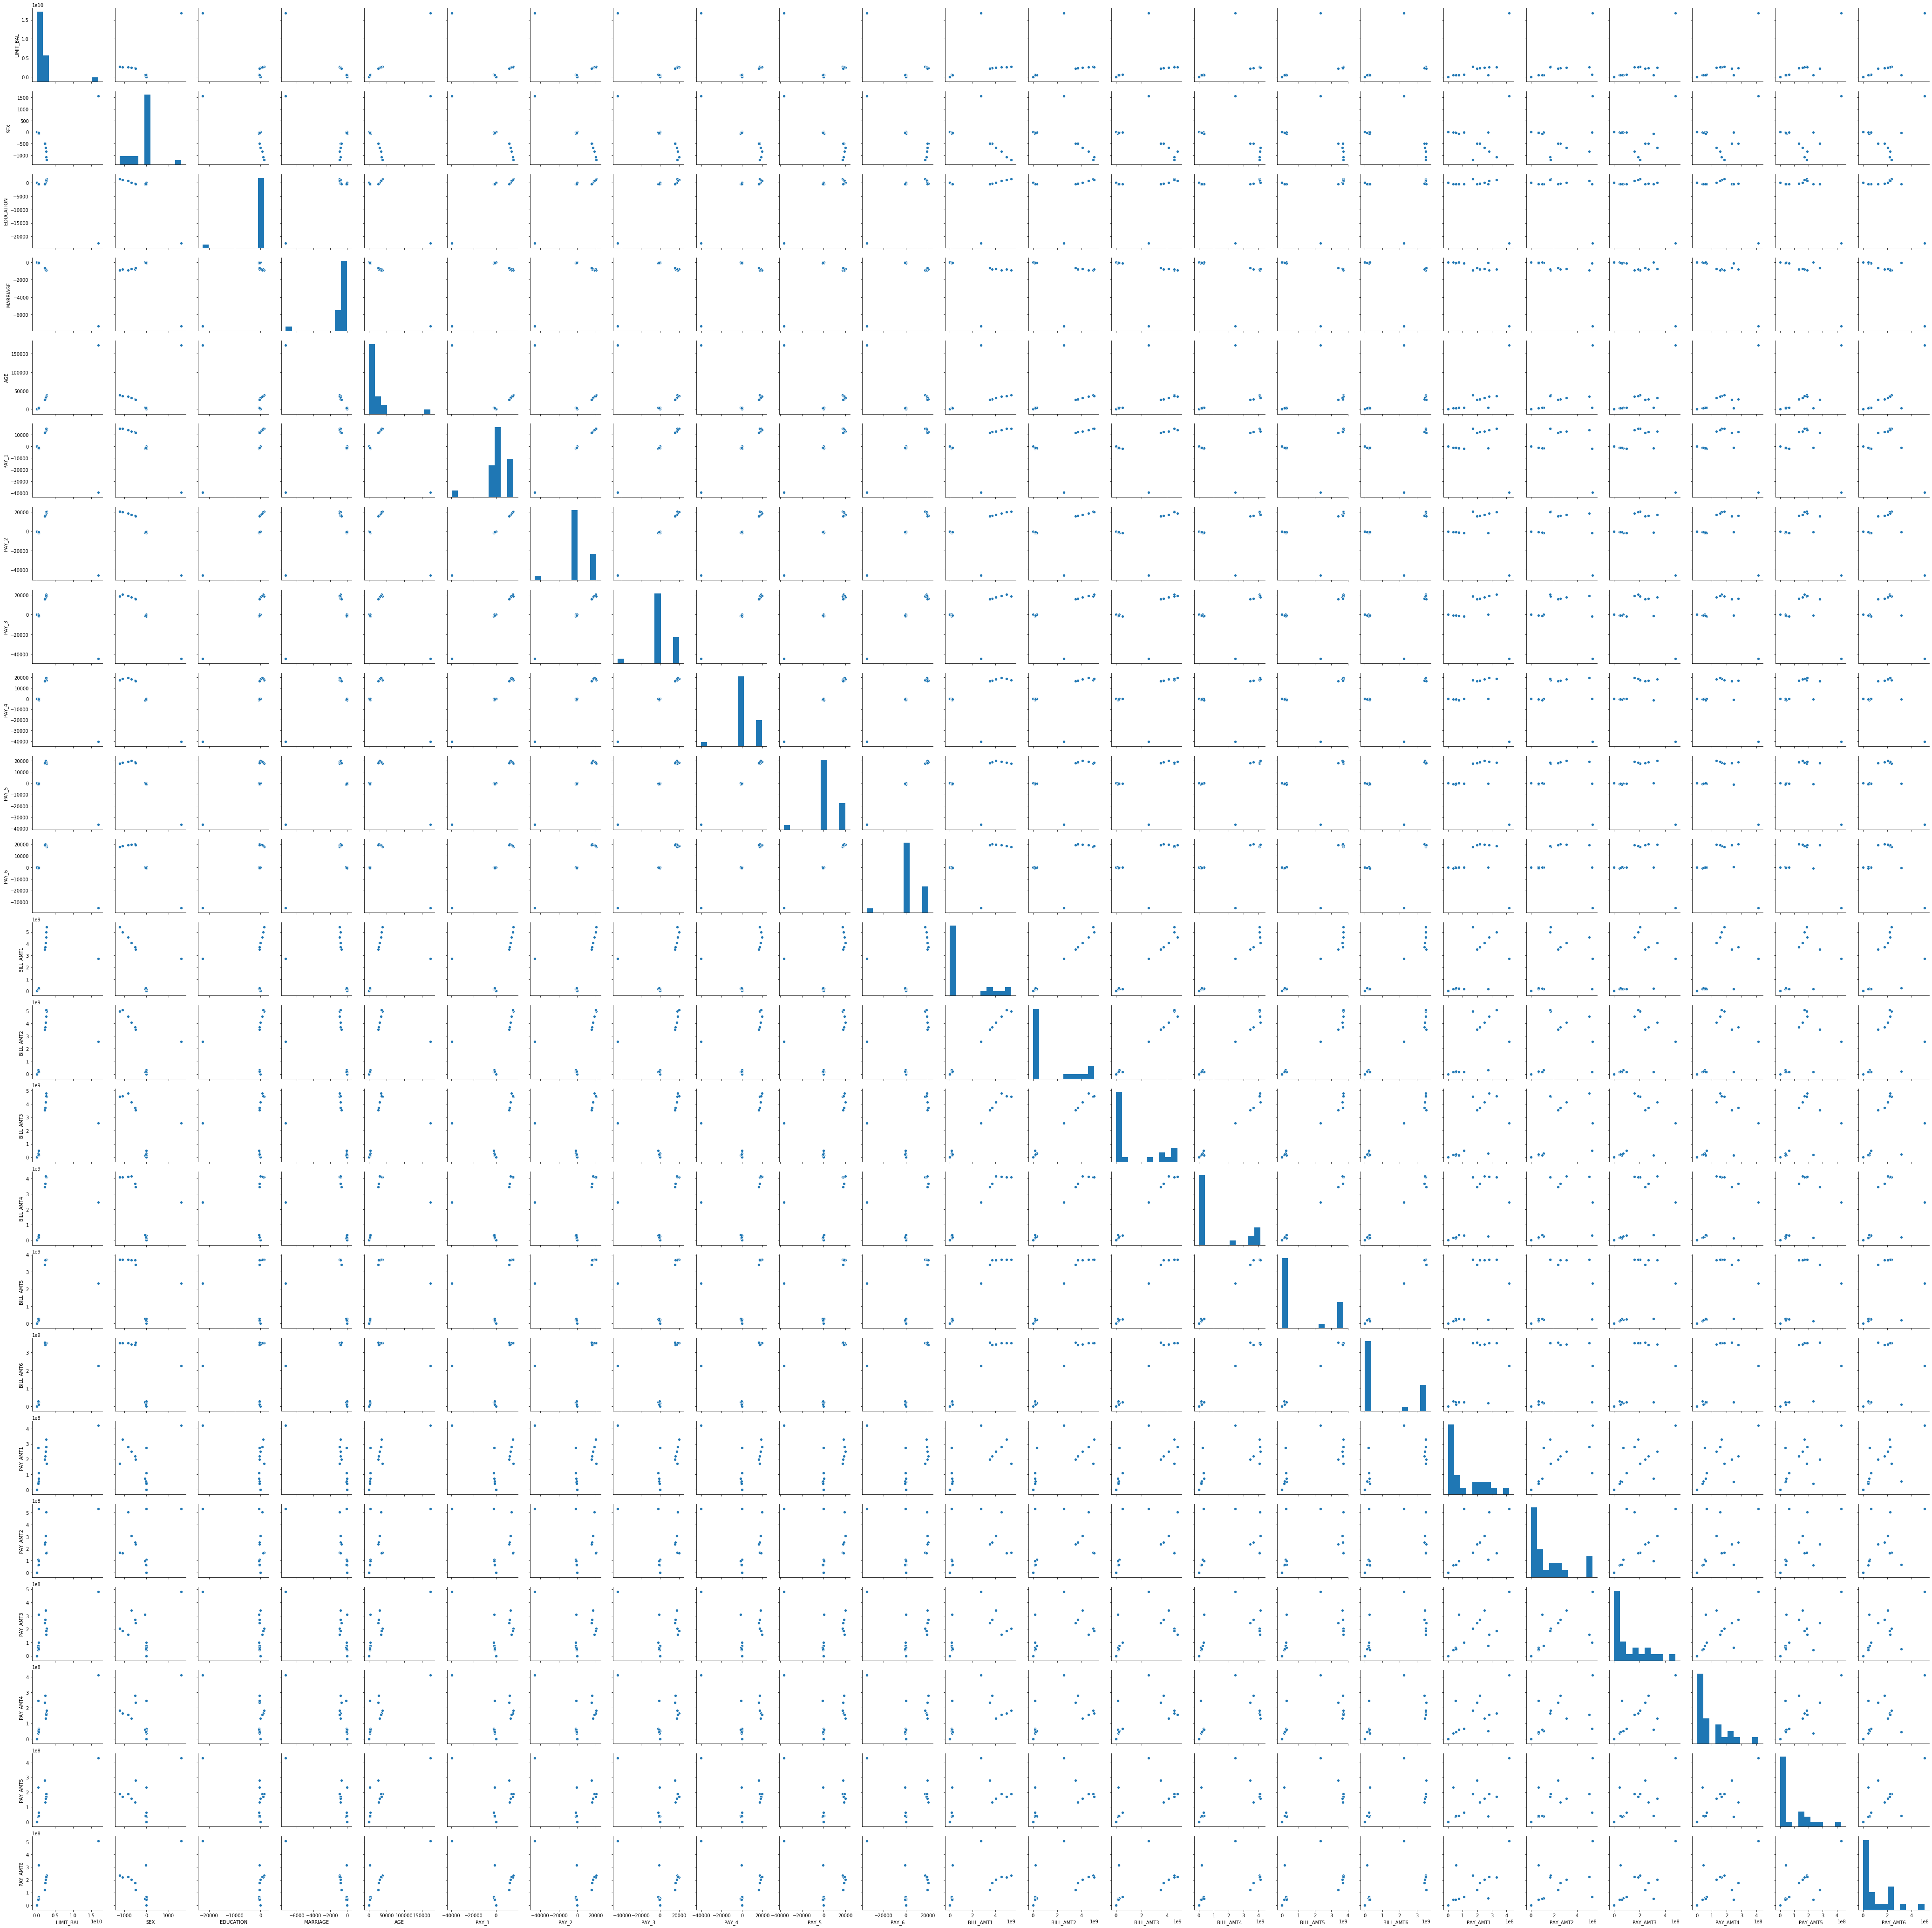

In [320]:
sns.pairplot(data = covMat)
plt.show()